In [1]:
pip install --upgrade scipy

Requirement already up-to-date: scipy in c:\anaconda3\lib\site-packages (1.6.2)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import data from csv file - Spotify Dataset

path_to_file = 'data.csv'
df = pd.read_csv(path_to_file, engine='python')

df.sample(5)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
4387,0.951,['K.C.Dey'],0.398,195560,0.229,0,0DfQRV5QuoUJoFo0Mqtp1O,0.929000,3,0.114,-14.441,1,Man Murakh Kahna Maan,0,1942-01-01,0.0462,68.467,0.337,1942
107989,0.967,"['Joseph Lanner', 'Georges Prêtre', 'Wiener Ph...",0.313,514547,0.208,0,1UEGIqcOSn9KEHEPDZ6Huj,0.806000,4,0.682,-18.050,1,"Hofball-Tänze, Walzer, Op. 161",15,2008,0.0494,103.208,0.180,2008
147571,0.771,['The Impressions'],0.431,164067,0.404,0,5Dt3qOrc3idAo0xsV4mJiZ,0.000000,4,0.172,-7.475,1,I Thank Heaven,13,1964-06-07,0.0290,94.418,0.409,1964
69593,0.584,"['Charly McClain', 'Mickey Gilley']",0.542,179827,0.523,0,0TzomM2SvRI14nj83TRjVN,0.000003,3,0.106,-9.854,1,Paradise Tonight (with Mickey Gilley),33,1985-04-01,0.0865,204.271,0.662,1985
38121,0.719,['Armin van Buuren'],0.489,94027,0.409,0,0PlFgwO9uFTHH8FuMcS464,0.000001,2,0.930,-12.972,0,A State of Trance Year Mix 2014 - Look What I ...,2,2014-12-19,0.6900,121.162,0.478,2014


Trimming tail/outliers for 'duration_ms'.

In [5]:
def trim_duration(data, procentile):
    data_trim = data[data['duration_ms'] < np.percentile(data['duration_ms'], procentile)].dropna()
    return data_trim

df = trim_duration(df, 99)

In [6]:
targets = ['danceability', 'loudness', 'duration_ms']
predictors = ['popularity', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'year']

# Rejection sampling

## Danceability

### Inverse sampling

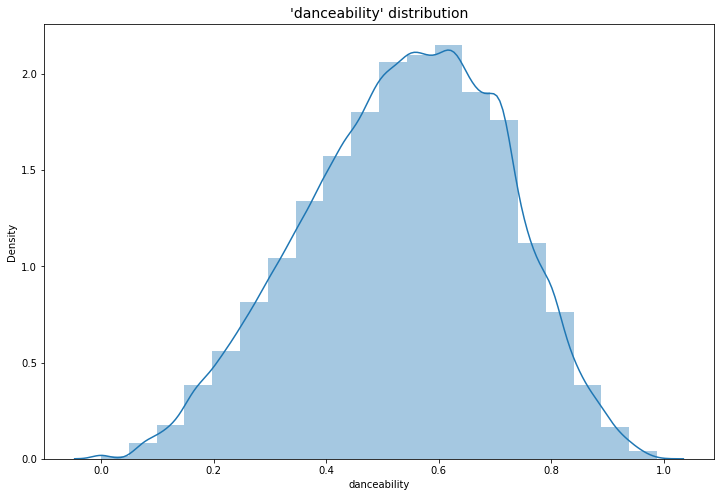

In [7]:
plt.figure(figsize=(12, 8))
sns.distplot(df['danceability'], kde=True, bins=20, norm_hist=True)
plt.title("'danceability' distribution", size=14)
plt.show()

In the first lab, we estimated the *danceability* distribution by an **exponpow** distribution. We take the parameters estimated by the MLE method and generate a sample using the inverse CDF method.

In [8]:
ml_estimates = (2.5917524604655537, -0.011026157636226535, 0.7211946443806283)  # from lab 1
sample = [stats.exponpow.ppf(np.random.rand(), *ml_estimates) for _ in range(10_000)]

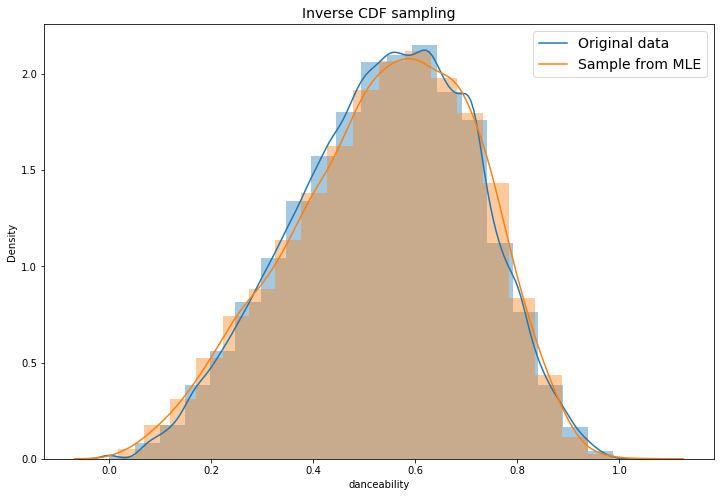

In [9]:
plt.figure(figsize=(12, 8))
sns.distplot(df['danceability'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Inverse CDF sampling", size=14)
plt.legend(["Original data", "Sample from MLE"], prop={"size": 14})
plt.show()

### Rejection  sampling method
Now let's try to generate a sample using the rejection  sampling method. We take the uniform distribution as a majorant.

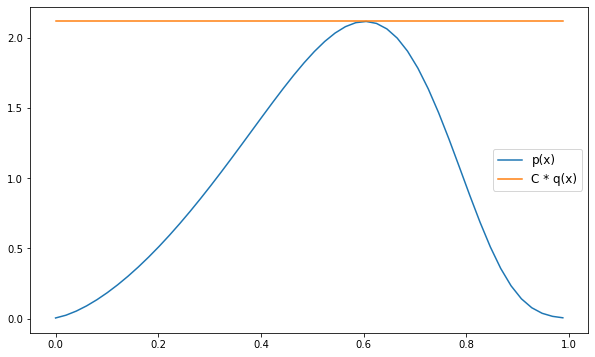

In [10]:
a, b = df['danceability'].min(), df['danceability'].max()

def p(x):
  return stats.exponpow.pdf(x, *ml_estimates)

def q(x):
  return stats.uniform.pdf(x, a, b - a)

xs = np.linspace(a, b)
k = max(p(xs) / q(xs))

def rejection_sampling(size):
    sample = []
    while len(sample) < size:
        z = np.random.uniform(a, b)
        u = np.random.uniform(0, k * q(z))
        if u <= p(z):
            sample.append(z)
    return np.array(sample)

plt.figure(figsize=(10, 6))
plt.plot(xs, p(xs))
plt.plot(xs, k * q(xs))
plt.legend(["p(x)", "C * q(x)"], prop={"size": 12})
plt.show()

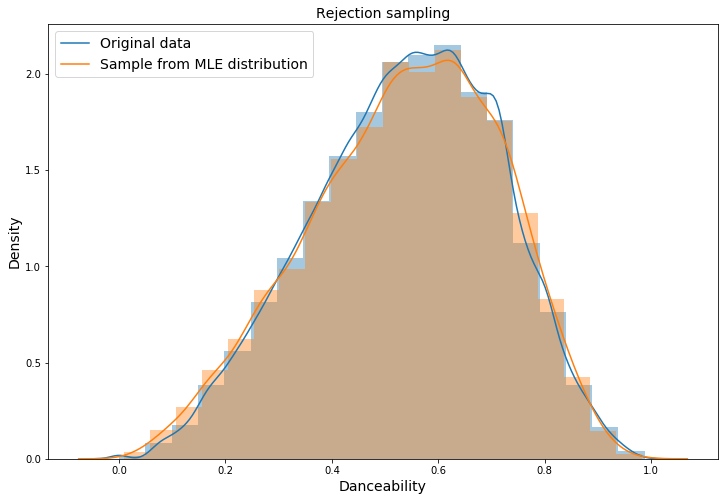

In [11]:
sample = rejection_sampling(10_000)

plt.figure(figsize=(12, 8))
sns.distplot(df['danceability'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Rejection sampling", size=14)
plt.xlabel("Danceability", size=14)
plt.ylabel("Density", size=14)
plt.legend(["Original data", "Sample from MLE distribution"], prop={"size": 14})
plt.show()

## Loudness

### Inverse sampling

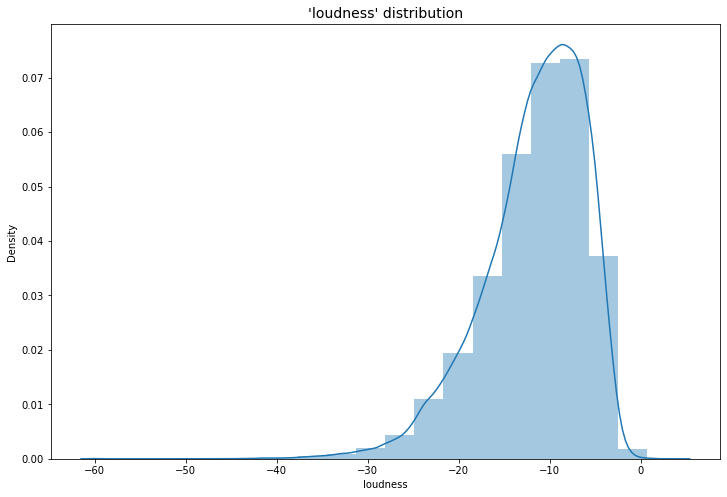

In [12]:
plt.figure(figsize=(12, 8))
sns.distplot(df['loudness'], kde=True, bins=20, norm_hist=True)
plt.title("'loudness' distribution", size=14)
plt.show()

In [13]:
ml_estimates = (-5.583874799847894, -4.541552390857278, 9.185209082565974)  # from lab 1
sample = [stats.skewnorm.ppf(np.random.rand(), *ml_estimates) for _ in range(10_000)]

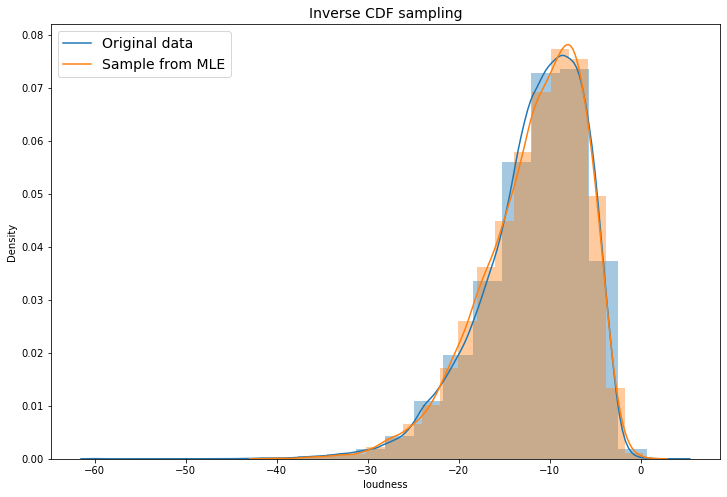

In [14]:
plt.figure(figsize=(12, 8))
sns.distplot(df['loudness'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Inverse CDF sampling", size=14)
plt.legend(["Original data", "Sample from MLE"], prop={"size": 14})
plt.show()

### Rejection  sampling method
Now let's try to generate a sample using the rejection  sampling method. We take the uniform distribution as a majorant.

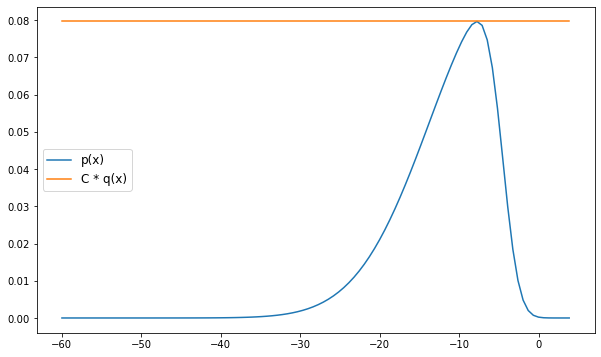

In [15]:
a, b = df['loudness'].min(), df['loudness'].max()

def p(x):
  return stats.skewnorm.pdf(x, *ml_estimates)

def q(x):
  return stats.uniform.pdf(x, a, b - a)

xs = np.linspace(a, b, 100)
k = max(p(xs) / q(xs))

def rejection_sampling(size):
    sample = []
    while len(sample) < size:
        z = np.random.uniform(a, b)
        u = np.random.uniform(0, k * q(z))
        if u <= p(z):
            sample.append(z)
    return np.array(sample)

plt.figure(figsize=(10, 6))
plt.plot(xs, p(xs))
plt.plot(xs, k * q(xs))
plt.legend(["p(x)", "C * q(x)"], prop={"size": 12})
plt.show()

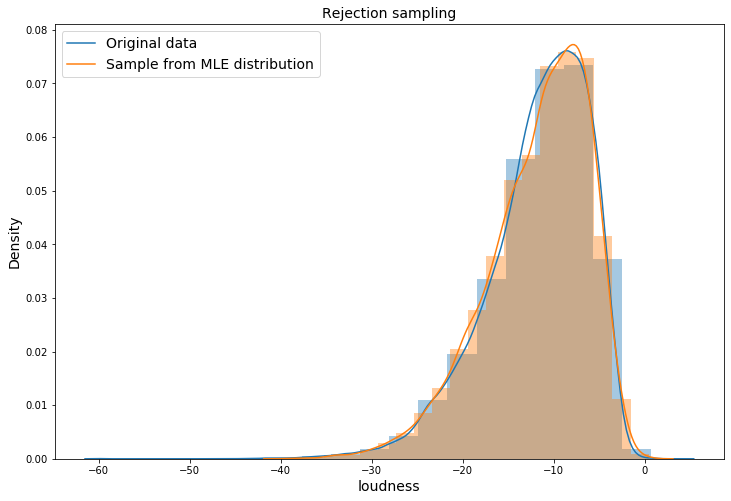

In [16]:
sample = rejection_sampling(10_000)

plt.figure(figsize=(12, 8))
sns.distplot(df['loudness'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Rejection sampling", size=14)
plt.xlabel("loudness", size=14)
plt.ylabel("Density", size=14)
plt.legend(["Original data", "Sample from MLE distribution"], prop={"size": 14})
plt.show()

## Duration_ms

### Inverse sampling

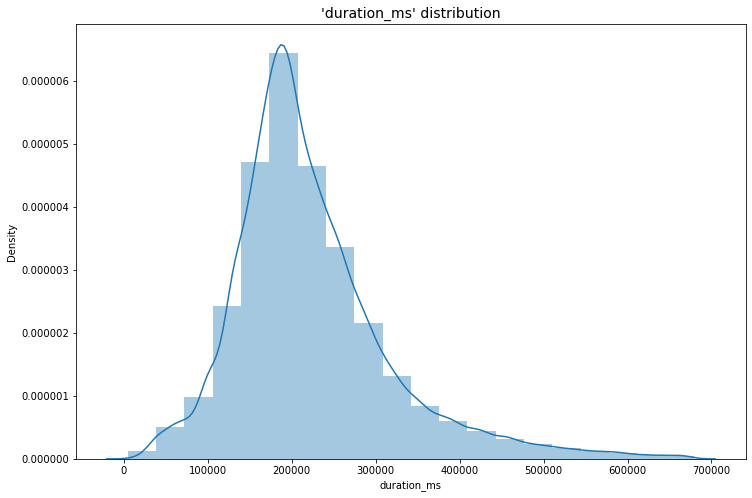

In [17]:
plt.figure(figsize=(12, 8))
sns.distplot(df['duration_ms'], kde=True, bins=20, norm_hist=True)
plt.title("'duration_ms' distribution", size=14)
plt.show()

In [18]:
ml_estimates = (1.7043460795438778, 144040.20144266787, 46792.60311409968)  # from lab 1
sample = [stats.exponnorm.ppf(np.random.rand(), *ml_estimates) for _ in range(10_000)]

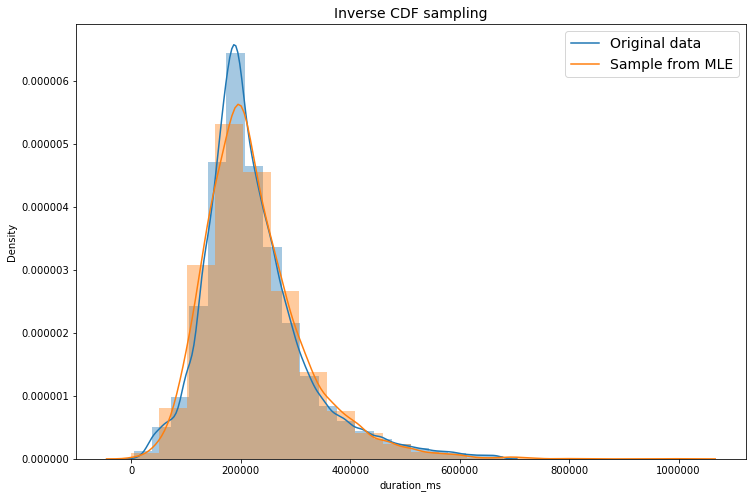

In [19]:
plt.figure(figsize=(12, 8))
sns.distplot(df['duration_ms'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Inverse CDF sampling", size=14)
plt.legend(["Original data", "Sample from MLE"], prop={"size": 14})
plt.show()

### Rejection  sampling method
Now let's try to generate a sample using the rejection  sampling method. We take the uniform distribution as a majorant.

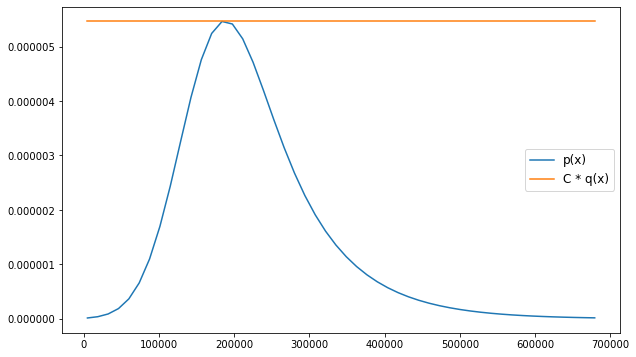

In [20]:
a, b = df['duration_ms'].min(), df['duration_ms'].max()

def p(x):
  return stats.exponnorm.pdf(x, *ml_estimates)

def q(x):
  return stats.uniform.pdf(x, a, b - a)

xs = np.linspace(a, b)
k = max(p(xs) / q(xs))

def rejection_sampling(size):
    sample = []
    while len(sample) < size:
        z = np.random.uniform(a, b)
        u = np.random.uniform(0, k * q(z))
        if u <= p(z):
            sample.append(z)
    return np.array(sample)

plt.figure(figsize=(10, 6))
plt.plot(xs, p(xs))
plt.plot(xs, k * q(xs))
plt.legend(["p(x)", "C * q(x)"], prop={"size": 12})
plt.show()

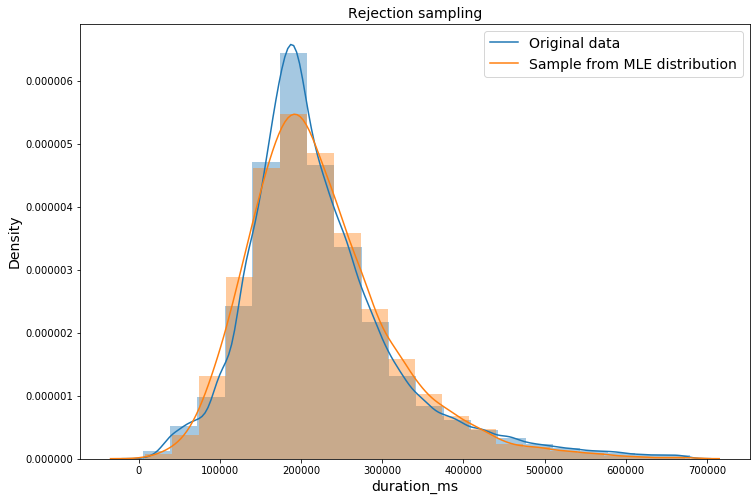

In [21]:
sample = rejection_sampling(10_000)

plt.figure(figsize=(12, 8))
sns.distplot(df['duration_ms'], kde=True, bins=20, norm_hist=True)
sns.distplot(sample, kde=True, bins=20, norm_hist=True)
plt.title("Rejection sampling", size=14)
plt.xlabel("duration_ms", size=14)
plt.ylabel("Density", size=14)
plt.legend(["Original data", "Sample from MLE distribution"], prop={"size": 14})
plt.show()

# Correlation

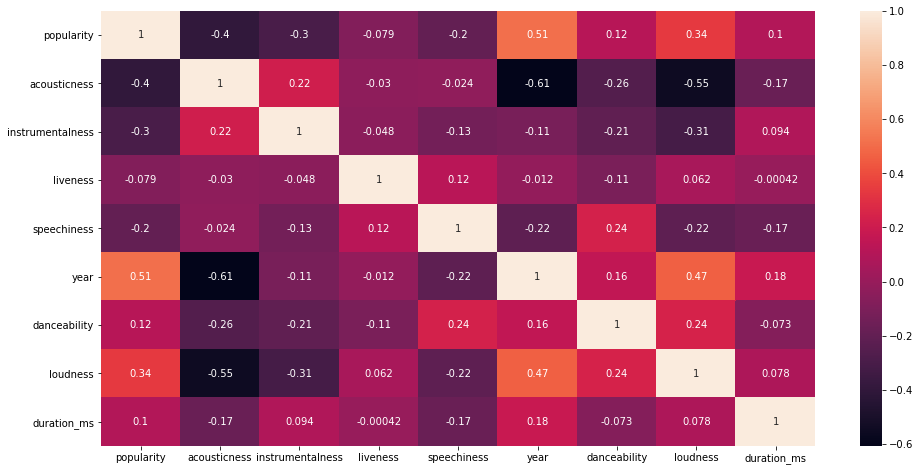

In [22]:
correlation_mat = df[predictors + targets].corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [23]:
data = df[predictors + targets]

rho = data.corr()
pval = data.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*rho.shape)

In [24]:
pval

,popularity,acousticness,instrumentalness,liveness,speechiness,year,danceability,loudness,duration_ms
popularity,0.000000e+00,0.000000e+00,0.000000e+00,4.094647e-236,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
acousticness,0.000000e+00,0.000000e+00,0.000000e+00,1.299104e-35,1.132197e-22,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
instrumentalness,0.000000e+00,0.000000e+00,0.000000e+00,2.854719e-89,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
liveness,4.094647e-236,1.299104e-35,2.854719e-89,0.000000e+00,0.000000e+00,0.000002,0.000000e+00,1.172918e-148,8.628695e-01
speechiness,0.000000e+00,1.132197e-22,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
year,0.000000e+00,0.000000e+00,0.000000e+00,1.587834e-06,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
danceability,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.554331e-200
loudness,0.000000e+00,0.000000e+00,0.000000e+00,1.172918e-148,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.738218e-229
duration_ms,0.000000e+00,0.000000e+00,0.000000e+00,8.628695e-01,0.000000e+00,0.000000,2.554331e-200,1.738218e-229,0.000000e+00


# Bayesian network

In [25]:
!pip install pgmpy

You should consider upgrading via the 'C:\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [29]:
from sklearn.preprocessing import KBinsDiscretizer

In [30]:
def sampling (bn, data: pd.DataFrame, n: int = 100):
  bn_new = BayesianModel(bn.edges())
  bn_new.fit(data)
  sampler = BayesianModelSampling(bn_new)
  sample = sampler.forward_sample(size=n, return_type='dataframe')
  return sample

In [31]:
data_t = data.copy()
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data_discrete = est.fit_transform(data_t)
data_t[data_t.columns] = data_discrete

## Hand-crafted networks

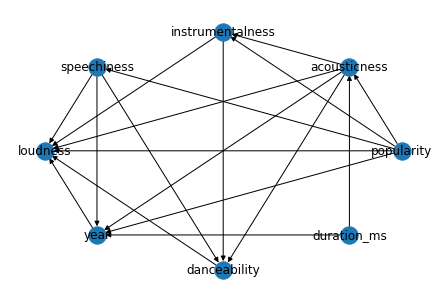

In [34]:
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
import networkx as nx

cancer_model = BayesianModel([
         ('popularity', 'acousticness'),
         ('popularity', 'instrumentalness'),
         ('popularity', 'speechiness'),       
         ('popularity', 'loudness'),    
         ('popularity', 'year'),               
         ('acousticness', 'instrumentalness'),               
         ('acousticness', 'year'),                                   
         ('acousticness', 'danceability'),    
         ('acousticness', 'loudness'),
         ('instrumentalness', 'danceability'), 
         ('instrumentalness', 'loudness'), 
         ('speechiness', 'year'), 
         ('speechiness', 'danceability'), 
         ('speechiness', 'loudness'), 
         ('year', 'loudness'), 
         ('danceability', 'loudness'),
         ('duration_ms', 'acousticness'),
         ('duration_ms', 'year'),
])
cancer_model

G_K2 = nx.DiGraph()
G_K2.add_edges_from(cancer_model.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True)

In [35]:
sample = sampling(cancer_model, data_t, 10000)

Generating for node: loudness: 100%|█████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.00it/s]


In [36]:
from scipy.stats import chisquare

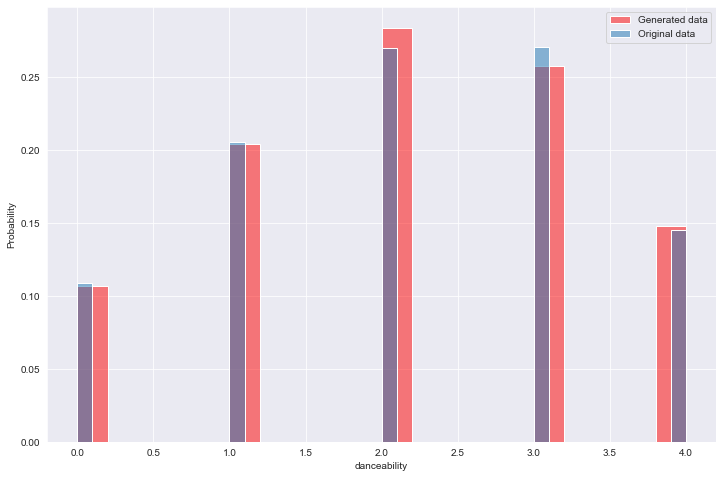

In [37]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.danceability, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.danceability, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()

In [43]:
chisquare(sample.danceability.value_counts()/len(sample.danceability), data_t.danceability.value_counts()/len(data_t.danceability))

Power_divergenceResult(statistic=0.00128499798897565, pvalue=0.9999997936859086)

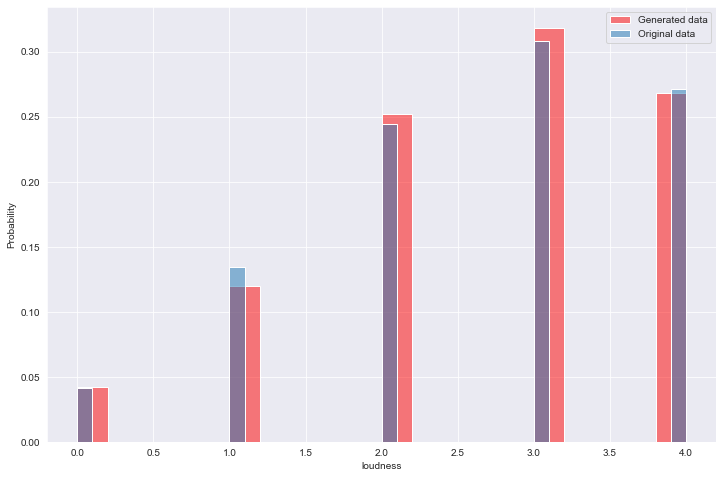

In [44]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.loudness, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.loudness, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()

In [45]:
chisquare(sample.loudness.value_counts()/len(sample.loudness), data_t.loudness.value_counts()/len(data_t.loudness))

Power_divergenceResult(statistic=0.0023277926329097758, pvalue=0.9999993231980121)

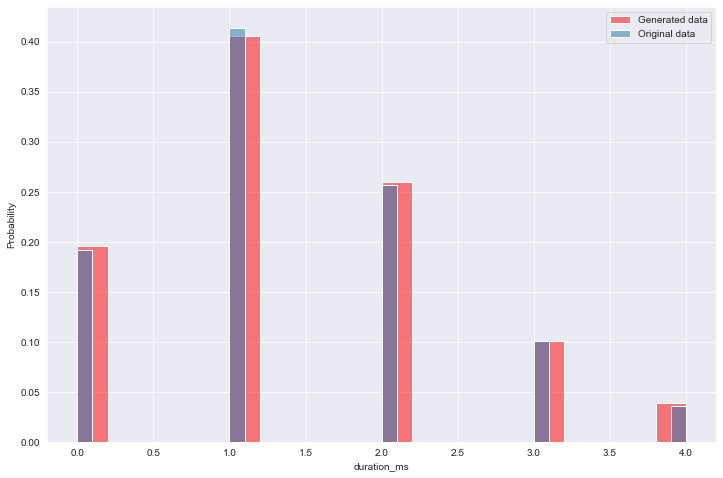

In [46]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.duration_ms, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.duration_ms, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()

In [47]:
chisquare(sample.duration_ms.value_counts()/len(sample.duration_ms), data_t.duration_ms.value_counts()/len(data_t.duration_ms))

Power_divergenceResult(statistic=0.0004180575496580552, pvalue=0.9999999781565297)

## Hill Climb Search

In [48]:
from sklearn.preprocessing import KBinsDiscretizer
from pgmpy.estimators import (
    BDeuScore,
    BicScore,
    HillClimbSearch,
    K2Score,
    TreeSearch,
)
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
from pgmpy.base import DAG

  0%|                                                                         | 28/1000000 [00:11<111:08:14,  2.50it/s]


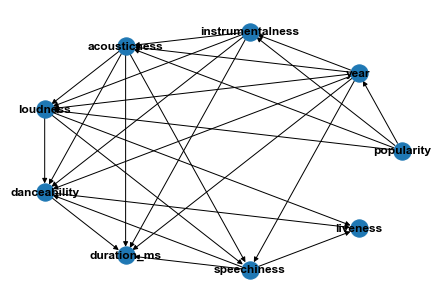

In [49]:
hc = HillClimbSearch(data_t, scoring_method=K2Score(data_t))

best_model = hc.estimate()

G_K2 = nx.DiGraph()
G_K2.add_edges_from(best_model.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True, font_weight='bold')

In [50]:
sample = sampling(best_model, data_t, 10000)

Generating for node: liveness: 100%|█████████████████████████████████████████████████████| 9/9 [00:01<00:00,  4.70it/s]


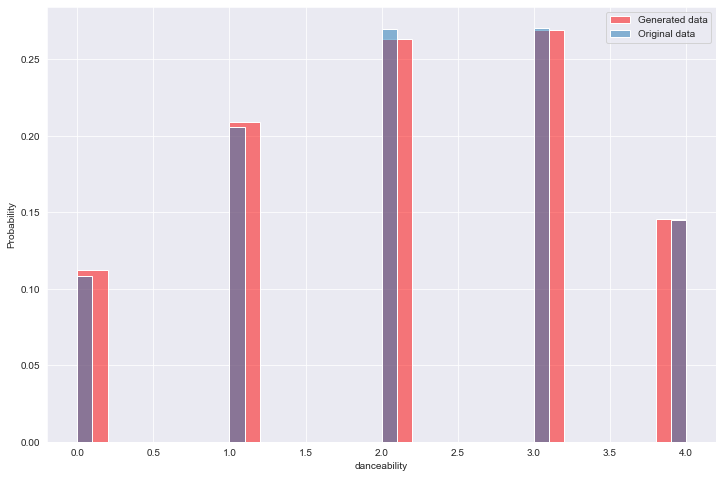

In [51]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.danceability, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.danceability, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()

In [53]:
chisquare(sample.danceability.value_counts()/len(sample.danceability), data_t.danceability.value_counts()/len(data_t.danceability))

Power_divergenceResult(statistic=0.00032835877548841616, pvalue=0.9999999865240393)

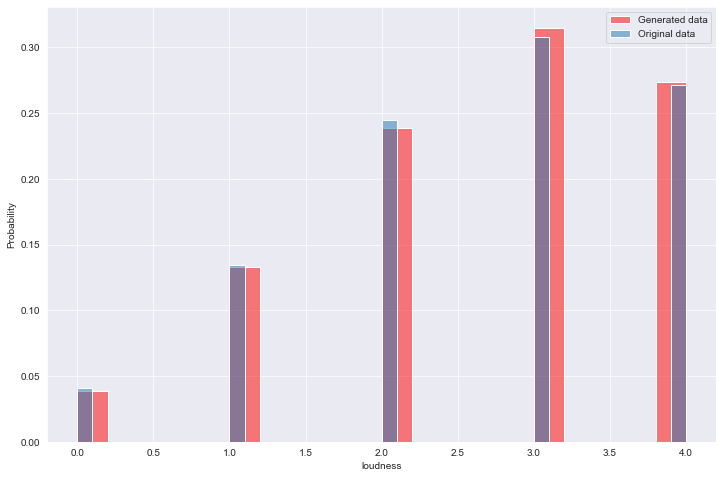

In [52]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.loudness, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.loudness, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()

In [54]:
chisquare(sample.loudness.value_counts()/len(sample.loudness), data_t.loudness.value_counts()/len(data_t.loudness))

Power_divergenceResult(statistic=0.0004638889340736254, pvalue=0.9999999731050412)

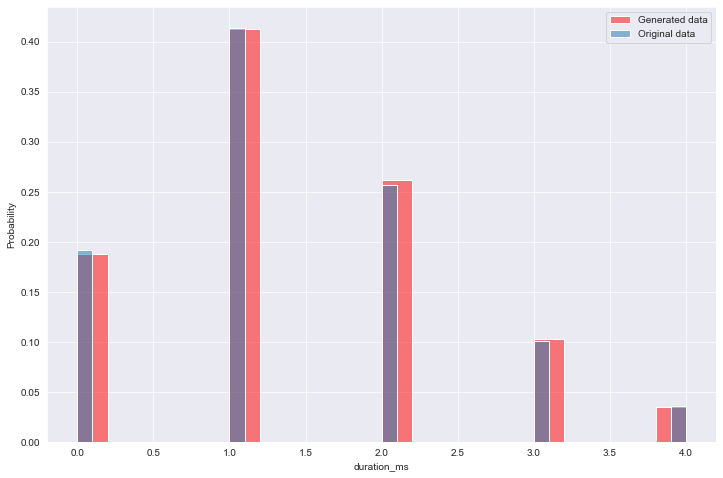

In [55]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.duration_ms, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.duration_ms, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()

In [56]:
chisquare(sample.duration_ms.value_counts()/len(sample.duration_ms), data_t.duration_ms.value_counts()/len(data_t.duration_ms))

Power_divergenceResult(statistic=0.0002648844456065707, pvalue=0.9999999912303031)

## Tree search

Building tree: 100%|█████████████████████████████████████████████████████████████████| 36/36.0 [00:00<00:00, 78.26it/s]


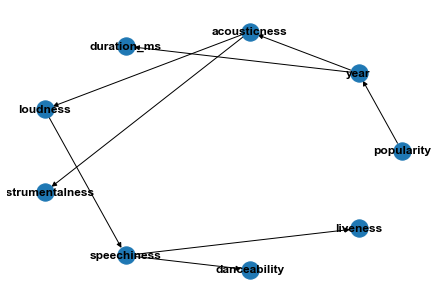

In [57]:
tree_search = TreeSearch(data_t, root_node='popularity')

best_model_tree = tree_search.estimate()

G_K2 = nx.DiGraph()
G_K2.add_edges_from(best_model_tree.edges())
pos = nx.layout.circular_layout(G_K2)
nx.draw(G_K2, pos, with_labels=True, font_weight='bold')

In [58]:
sample = sampling(best_model_tree, data_t, 10000)

Generating for node: danceability: 100%|█████████████████████████████████████████████████| 9/9 [00:00<00:00, 28.57it/s]


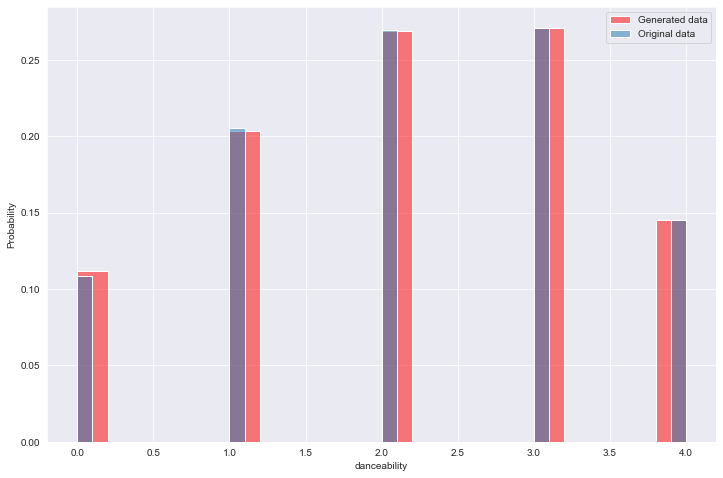

In [59]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.danceability, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.danceability, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()

In [60]:
chisquare(sample.danceability.value_counts()/len(sample.danceability), data_t.danceability.value_counts()/len(data_t.danceability))

Power_divergenceResult(statistic=0.00011137135257300833, pvalue=0.9999999984496103)

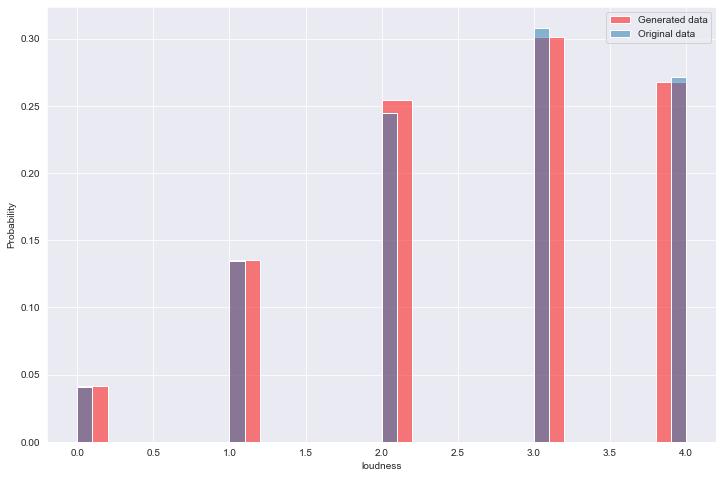

In [61]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.loudness, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.loudness, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()

In [62]:
chisquare(sample.loudness.value_counts()/len(sample.loudness), data_t.loudness.value_counts()/len(data_t.loudness))

Power_divergenceResult(statistic=0.0005930584648168156, pvalue=0.9999999560438975)

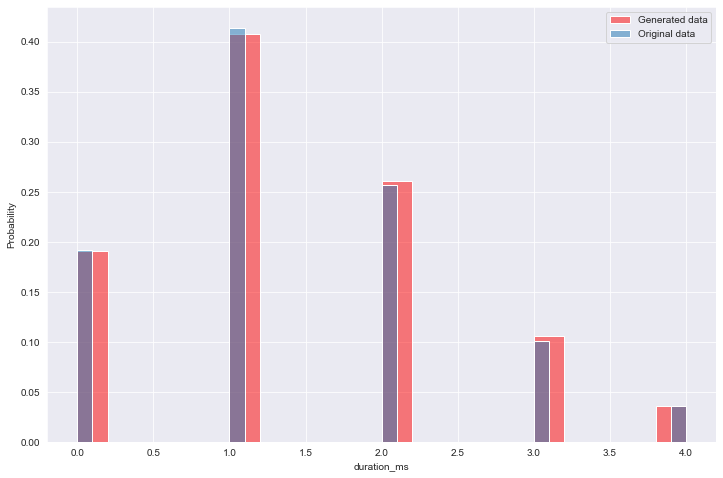

In [63]:
plt.figure(figsize=(12, 8))
sns.set_style('darkgrid')
sns.histplot(sample.duration_ms, label='Generated data', binwidth=0.2, stat='probability', color='r', alpha=0.5)
sns.histplot(data_t.duration_ms, label='Original data', binwidth=0.1, stat='probability', alpha=0.5, multiple='dodge')
plt.legend()

In [64]:
chisquare(sample.duration_ms.value_counts()/len(sample.duration_ms), data_t.duration_ms.value_counts()/len(data_t.duration_ms))

Power_divergenceResult(statistic=0.0004054267415047494, pvalue=0.9999999794564212)